In [38]:
import itertools
from sqlalchemy import create_engine
import os
import json
from urllib.parse import urlparse
import numpy as np
import pandas as pd
import feedparser
from newsie.constants import FEED_URL
from newsie.utils import extract_html, get_summary, extract_links
import ssl
import duckdb

import networkx as nx
import matplotlib.pyplot as plt
import itertools

if hasattr(ssl, '_create_unverified_context'):
    ssl._create_default_https_context = ssl._create_unverified_context
%load_ext dotenv
%dotenv

The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv


In [39]:

feed = feedparser.parse(FEED_URL)
feed


{'bozo': False,
 'entries': [{'title': 'Back-to-back storms will bring snow — and avalanche danger — to Utah',
   'title_detail': {'type': 'text/plain',
    'language': None,
    'base': 'https://www.sltrib.com/rss/feed/?sec=/News/Utah/&level=1',
    'value': 'Back-to-back storms will bring snow — and avalanche danger — to Utah'},
   'links': [{'rel': 'alternate',
     'type': 'text/html',
     'href': 'https://www.sltrib.com/news/2024/01/09/back-to-back-storms-will-being/'}],
   'link': 'https://www.sltrib.com/news/2024/01/09/back-to-back-storms-will-being/',
   'id': 'https://www.sltrib.com/news/2024/01/09/back-to-back-storms-will-being/',
   'guidislink': False,
   'authors': [{'name': 'Scott D. Pierce'}],
   'author': 'Scott D. Pierce',
   'author_detail': {'name': 'Scott D. Pierce'},
   'published': 'Tue, 09 Jan 2024 16:12:11 +0000',
   'published_parsed': time.struct_time(tm_year=2024, tm_mon=1, tm_mday=9, tm_hour=16, tm_min=12, tm_sec=11, tm_wday=1, tm_yday=9, tm_isdst=0),
   's

In [40]:
df = pd.DataFrame(feed.entries)
df

,title,title_detail,links,link,id,guidislink,authors,author,author_detail,published,published_parsed,summary,summary_detail,content
0,Back-to-back storms will bring snow — and aval...,"{'type': 'text/plain', 'language': None, 'base...","[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://www.sltrib.com/news/2024/01/09/back-to...,https://www.sltrib.com/news/2024/01/09/back-to...,False,[{'name': 'Scott D. Pierce'}],Scott D. Pierce,{'name': 'Scott D. Pierce'},"Tue, 09 Jan 2024 16:12:11 +0000","(2024, 1, 9, 16, 12, 11, 1, 9, 0)",A winter storm warning is in effect in norther...,"{'type': 'text/html', 'language': None, 'base'...","[{'type': 'text/html', 'language': None, 'base..."
1,Commentary: Why didn’t President Biden kick of...,"{'type': 'text/plain', 'language': None, 'base...","[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://www.sltrib.com/religion/2024/01/09/com...,https://www.sltrib.com/religion/2024/01/09/com...,False,[{'name': 'Mark Silk | Religion News Service'}],Mark Silk | Religion News Service,{'name': 'Mark Silk | Religion News Service'},"Tue, 09 Jan 2024 16:00:00 +0000","(2024, 1, 9, 16, 0, 0, 1, 9, 0)",Columnist discusses why Joe Biden kicked off h...,"{'type': 'text/html', 'language': None, 'base'...","[{'type': 'text/html', 'language': None, 'base..."
2,Opinion: Press pause on animal shelter changes...,"{'type': 'text/plain', 'language': None, 'base...","[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://www.sltrib.com/opinion/commentary/2024...,https://www.sltrib.com/opinion/commentary/2024...,False,[{'name': 'Julie Castle | For The Salt Lake Tr...,Julie Castle | For The Salt Lake Tribune,{'name': 'Julie Castle | For The Salt Lake Tri...,"Tue, 09 Jan 2024 15:25:35 +0000","(2024, 1, 9, 15, 25, 35, 1, 9, 0)",“Implicitly encouraging pet abandonment as the...,"{'type': 'text/html', 'language': None, 'base'...","[{'type': 'text/html', 'language': None, 'base..."
3,Letter: Cox has abandoned the compassion and i...,"{'type': 'text/plain', 'language': None, 'base...","[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://www.sltrib.com/opinion/letters/2024/01...,https://www.sltrib.com/opinion/letters/2024/01...,False,[{'name': 'Jacob Newman | The Public Forum'}],Jacob Newman | The Public Forum,{'name': 'Jacob Newman | The Public Forum'},"Tue, 09 Jan 2024 13:00:00 +0000","(2024, 1, 9, 13, 0, 0, 1, 9, 0)",,"{'type': 'text/html', 'language': None, 'base'...","[{'type': 'text/html', 'language': None, 'base..."
4,Gordon Monson: LDS Church owns most of the lan...,"{'type': 'text/plain', 'language': None, 'base...","[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://www.sltrib.com/religion/2024/01/09/gor...,https://www.sltrib.com/religion/2024/01/09/gor...,False,[{'name': 'Gordon Monson'}],Gordon Monson,{'name': 'Gordon Monson'},"Tue, 09 Jan 2024 13:00:00 +0000","(2024, 1, 9, 13, 0, 0, 1, 9, 0)",Tribune columnist Gordon Monson on the LDS Chu...,"{'type': 'text/html', 'language': None, 'base'...","[{'type': 'text/html', 'language': None, 'base..."
5,Opinion: What will happen to Gaza’s people?,"{'type': 'text/plain', 'language': None, 'base...","[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://www.sltrib.com/opinion/commentary/2024...,https://www.sltrib.com/opinion/commentary/2024...,False,[{'name': 'Peter Beinart | For The New York Ti...,Peter Beinart | For The New York Times,{'name': 'Peter Beinart | For The New York Tim...,"Tue, 09 Jan 2024 13:00:00 +0000","(2024, 1, 9, 13, 0, 0, 1, 9, 0)",,"{'type': 'text/html', 'language': None, 'base'...","[{'type': 'text/html', 'language': None, 'base..."
6,Letter: What’s going on with the Utah Democrat...,"{'type': 'text/plain', 'language': None, 'base...","[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://www.sltrib.com/opinion/letters/2024/01...,https://www.sltrib.com/opinion/letters/2024/01...,False,[{'name': 'Stephen Atkin | The Public Forum'}],Stephen Atkin | The Public Forum,{'name': 'Stephen Atkin | The Public Forum'},"Tue,

In [23]:
df = pd.json_normalize(feed.entries)
df = df.fillna('')
df

,title,links,link,id,guidislink,authors,author,published,published_parsed,summary,content,title_detail.type,title_detail.language,title_detail.base,title_detail.value,author_detail.name,summary_detail.type,summary_detail.language,summary_detail.base,summary_detail.value
0,Back-to-back storms will bring snow — and aval...,"[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://www.sltrib.com/news/2024/01/09/back-to...,https://www.sltrib.com/news/2024/01/09/back-to...,False,[{'name': 'Scott D. Pierce'}],Scott D. Pierce,"Tue, 09 Jan 2024 16:12:11 +0000","(2024, 1, 9, 16, 12, 11, 1, 9, 0)",A winter storm warning is in effect in norther...,"[{'type': 'text/html', 'language': None, 'base...",text/plain,,https://www.sltrib.com/rss/feed/?sec=/News/Uta...,Back-to-back storms will bring snow — and aval...,Scott D. Pierce,text/html,,https://www.sltrib.com/rss/feed/?sec=/News/Uta...,A winter storm warning is in effect in norther...
1,Commentary: Why didn’t President Biden kick of...,"[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://www.sltrib.com/religion/2024/01/09/com...,https://www.sltrib.com/religion/2024/01/09/com...,False,[{'name': 'Mark Silk | Religion News Service'}],Mark Silk | Religion News Service,"Tue, 09 Jan 2024 16:00:00 +0000","(2024, 1, 9, 16, 0, 0, 1, 9, 0)",Columnist discusses why Joe Biden kicked off h...,"[{'type': 'text/html', 'language': None, 'base...",text/plain,,https://www.sltrib.com/rss/feed/?sec=/News/Uta...,Commentary: Why didn’t President Biden kick of...,Mark Silk | Religion News Service,text/html,,https://www.sltrib.com/rss/feed/?sec=/News/Uta...,Columnist discusses why Joe Biden kicked off h...
2,Opinion: Press pause on animal shelter changes...,"[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://www.sltrib.com/opinion/commentary/2024...,https://www.sltrib.com/opinion/commentary/2024...,False,[{'name': 'Julie Castle | For The Salt Lake Tr...,Julie Castle | For The Salt Lake Tribune,"Tue, 09 Jan 2024 15:25:35 +0000","(2024, 1, 9, 15, 25, 35, 1, 9, 0)",“Implicitly encouraging pet abandonment as the...,"[{'type': 'text/html', 'language': None, 'base...",text/plain,,https://www.sltrib.com/rss/feed/?sec=/News/Uta...,Opinion: Press pause on animal shelter changes...,Julie Castle | For The Salt Lake Tribune,text/html,,https://www.sltrib.com/rss/feed/?sec=/News/Uta...,“Implicitly encouraging pet abandonment as the...
3,Letter: Cox has abandoned the compassion and i...,"[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://www.sltrib.com/opinion/letters/2024/01...,https://www.sltrib.com/opinion/letters/2024/01...,False,[{'name': 'Jacob Newman | The Public Forum'}],Jacob Newman | The Public Forum,"Tue, 09 Jan 2024 13:00:00 +0000","(2024, 1, 9, 13, 0, 0, 1, 9, 0)",,"[{'type': 'text/html', 'language': None, 'base...",text/plain,,https://www.sltrib.com/rss/feed/?sec=/News/Uta...,Letter: Cox has abandoned the compassion and i...,Jacob Newman | The Public Forum,text/html,,https://www.sltrib.com/rss/feed/?sec=/News/Uta...,
4,Gordon Monson: LDS Church owns most of the lan...,"[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://www.sltrib.com/religion/2024/01/09/gor...,https://www.sltrib.com/religion/2024/01/09/gor...,False,[{'name': 'Gordon Monson'}],Gordon Monson,"Tue, 09 Jan 2024 13:00:00 +0000","(2024, 1, 9, 13, 0, 0, 1, 9, 0)",Tribune columnist Gordon Monson on the LDS Chu...,"[{'type': 'text/html', 'language': None, 'base...",text/plain,,https://www.sltrib.com/rss/feed/?sec=/News/Uta...,Gordon Monson: LDS Church owns most of the lan...,Gordon Monson,text/html,,https://www.sltrib.com/rss/feed/?sec=/News/Uta...,Tribune columnist Gordon Monson on the LDS Chu...
5,Opinion: What will happen to Gaza’s people?,"[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://www.sltrib.com/opinion/commentary/2024...,https://www.sltrib.com/opinion/commentary/2024...,False,[{'name': 'Peter Beinart | For The New York Ti...,Peter Beinart | For The New York Times,"Tue, 09 Jan 2024 13:00:00 +0000","(202

In [41]:
df = df.convert_dtypes()
df.set_index('link')
df = df.drop(columns=['links', 'authors', 'published_parsed'])
# assume df is your DataFrame and 'content' is the column with list of dicts
df['content'] = df['content'].apply(lambda x: x[0]['value'] if x else '').astype(str)
df.dtypes

title             string[python]
title_detail              object
link              string[python]
id                string[python]
guidislink               boolean
author            string[python]
author_detail             object
published         string[python]
summary           string[python]
summary_detail            object
content                   object
dtype: object

In [25]:
df['link_texts'], df['link_hrefs'] = zip(*df['content'].apply(extract_links))

In [26]:
df

,title,link,id,guidislink,author,published,summary,content,title_detail.type,title_detail.language,title_detail.base,title_detail.value,author_detail.name,summary_detail.type,summary_detail.language,summary_detail.base,summary_detail.value,link_texts,link_hrefs
0,Back-to-back storms will bring snow — and aval...,https://www.sltrib.com/news/2024/01/09/back-to...,https://www.sltrib.com/news/2024/01/09/back-to...,False,Scott D. Pierce,"Tue, 09 Jan 2024 16:12:11 +0000",A winter storm warning is in effect in norther...,<p>A winter storm warning is in effect in nort...,text/plain,,https://www.sltrib.com/rss/feed/?sec=/News/Uta...,Back-to-back storms will bring snow — and aval...,Scott D. Pierce,text/html,,https://www.sltrib.com/rss/feed/?sec=/News/Uta...,A winter storm warning is in effect in norther...,"[The National Weather Service, utahavalanchece...","[https://www.weather.gov/slc/, http://utahaval..."
1,Commentary: Why didn’t President Biden kick of...,https://www.sltrib.com/religion/2024/01/09/com...,https://www.sltrib.com/religion/2024/01/09/com...,False,Mark Silk | Religion News Service,"Tue, 09 Jan 2024 16:00:00 +0000",Columnist discusses why Joe Biden kicked off h...,<p>It wasn’t a bad idea for President Joe Bide...,text/plain,,https://www.sltrib.com/rss/feed/?sec=/News/Uta...,Commentary: Why didn’t President Biden kick of...,Mark Silk | Religion News Service,text/html,,https://www.sltrib.com/rss/feed/?sec=/News/Uta...,Columnist discusses why Joe Biden kicked off h...,"[Biden said, Gettysburg Address, Section 3 of ...",[https://apnews.com/article/biden-speech-valle...
2,Opinion: Press pause on animal shelter changes...,https://www.sltrib.com/opinion/commentary/2024...,https://www.sltrib.com/opinion/commentary/2024...,False,Julie Castle | For The Salt Lake Tribune,"Tue, 09 Jan 2024 15:25:35 +0000",“Implicitly encouraging pet abandonment as the...,<p>The City of Tooele has been at the forefron...,text/plain,,https://www.sltrib.com/rss/feed/?sec=/News/Uta...,Opinion: Press pause on animal shelter changes...,Julie Castle | For The Salt Lake Tribune,text/html,,https://www.sltrib.com/rss/feed/?sec=/News/Uta...,“Implicitly encouraging pet abandonment as the...,"[a nearly 90% save rate since 2020, On Dec. 12...",[https://bestfriends.org/no-kill-2025/animal-s...
3,Letter: Cox has abandoned the compassion and i...,https://www.sltrib.com/opinion/letters/2024/01...,https://www.sltrib.com/opinion/letters/2024/01...,False,Jacob Newman | The Public Forum,"Tue, 09 Jan 2024 13:00:00 +0000",,<p>Shortly after the mass shooting at the Puls...,text/plain,,https://www.sltrib.com/rss/feed/?sec=/News/Uta...,Letter: Cox has abandoned the compassion and i...,Jacob Newman | The Public Forum,text/html,,https://www.sltrib.com/rss/feed/?sec=/News/Uta...,,"[moving speech, support same-sex marriage righ...",[https://archive.sltrib.com/article.php?id=966...
4,Gordon Monson: LDS Church owns most of the lan...,https://www.sltrib.com/religion/2024/01/09/gor...,https://www.sltrib.com/religion/2024/01/09/gor...,False,Gordon Monson,"Tue, 09 Jan 2024 13:00:00 +0000",Tribune columnist Gordon Monson on the LDS Chu...,"<p>As an <a href=""https://www.sltrib.com/relig...",text/plain,,https://www.sltrib.com/rss/feed/?sec=/News/Uta...,Gordon Monson: LDS Church owns most of the lan...,Gordon Monson,text/html,,https://www.sltrib.com/rss/feed/?sec=/News/Uta...,Tribune columnist Gordon Monson on the LDS Chu...,"[enormously wealthy church, The Salt Lake Trib...",[https://www.sltrib.com/religion/2023/07/16/ld...
5,Opinion: What will happen to Gaza’s people?,https://www.sltrib.com/opinion/commentary/2024...,https://www.sltrib.com/opinion/commentary/2024...,False,Peter Beinart | For The New York Times,"Tue, 09 Jan 2024 13:00:00 +0000",,<p>Conventional wisdom has generally held that...,text/plain,,https://www.sltrib.com/rss/feed/?sec=/News/Uta...,Opinion: What will happen to Gaza’s people?,Peter Beinart | For The New York Times,text/html,,https://www.sltrib.com/rss/feed/?sec=/Ne

In [27]:
DB_NAME = "scratch_analysis_inline.duckdb"
con = duckdb.connect(DB_NAME, read_only=False)
con.register("scratch_table", df)
con.execute("SELECT * FROM scratch_table").fetchall()
con.close()

In [28]:
url = os.environ['PG_DB_URL']

# connection = psycopg.connect(url)
from sqlalchemy import create_engine
engine = create_engine(url)

In [29]:
# df_flat = pd.json_normalize(df.to_dict(orient='list'))
df.to_sql("feed_df", engine, if_exists='replace')

51

# DB Load Bookmark

In [30]:
# 
# con = duckdb.connect(DB_NAME, read_only=False)
# df = con.execute("SELECT * FROM scratch_table").fetch_df()
# df

In [31]:
DB_NAME = "notebook.duckdb"
con = duckdb.connect(DB_NAME, read_only=False)
con.register("scratch_table", df)
df = con.execute("SELECT * FROM public.summarize_articles").fetch_df()

df.dtypes


id                  object
link_texts          object
link_hrefs          object
title               object
title_detail        object
links               object
link                object
guidislink            bool
authors             object
author              object
author_detail       object
published           object
published_parsed    object
summary             object
summary_detail      object
content             object
dtype: object

In [32]:
df = df.convert_dtypes()
df.dtypes

id                  string[python]
link_texts                  object
link_hrefs                  object
title               string[python]
title_detail                object
links                       object
link                string[python]
guidislink                 boolean
authors                     object
author              string[python]
author_detail               object
published           string[python]
published_parsed            object
summary             string[python]
summary_detail              object
content             string[python]
dtype: object

In [33]:
# Convert dictionary-like columns to JSON strings
dict_columns = ['link_texts', 'link_hrefs', 'title_detail', 'links', 'authors']  # Add or modify based on your actual dict-like columns

for column in dict_columns:
    ser_value = df[column].apply(json.dumps)
    df = df.assign(**{column: ser_value})

# Now you can write the DataFrame to PostgreSQL.
df.to_sql("summarize_articles", engine, if_exists='replace')

ProgrammingError: (psycopg2.ProgrammingError) can't adapt type 'dict'
[SQL: INSERT INTO summarize_articles (index, id, link_texts, link_hrefs, title, title_detail, links, link, guidislink, authors, author, author_detail, published, published_parsed, summary, summary_detail, content) VALUES (%(index__0)s, %(id__0)s, %(link_te ... 12881 characters truncated ... published__41)s, %(published_parsed__41)s, %(summary__41)s, %(summary_detail__41)s, %(content__41)s)]
[parameters: {'published_parsed__0': [2024, 1, 7, 19, 58, 22, 6, 7, 0], 'guidislink__0': False, 'link_texts__0': '["National Weather Service", "The Weather Channel"]', 'link__0': 'https://www.sltrib.com/news/2024/01/07/widespread-storm-brings-more-than/', 'id__0': 'https://www.sltrib.com/news/2024/01/07/widespread-storm-brings-more-than/', 'author_detail__0': {'name': 'Kolbie Peterson'}, 'authors__0': '[{"name": "Kolbie Peterson"}]', 'author__0': 'Kolbie Peterson', 'summary__0': '{\'input_documents\': [Document(page_content=\'[{\\\'type\\\': \\\'text/html\\\', \\\'language\\\': None, \\\'base\\\': \\\'https://www.sltrib.com/rs ... (2931 characters truncated) ... mes of the article are the recent winter storm, snowfall totals and forecasts, avalanche danger, and weather conditions in specific areas of Utah.\'}', 'content__0': '[{\'type\': \'text/html\', \'language\': None, \'base\': \'https://www.sltrib.com/rss/feed/?sec=/News/Utah/&level=1\', \'value\': \'<p>A widespread w ... (1858 characters truncated) ... valanches is “considerable” from Logan to central Utah, as well as in Moab. The danger is “moderate” in the Uintas.</p><p><br /></p><p><br /></p>\'}]', 'summary_detail__0': {'type': 'text/html', 'language': None, 'base': 'https://www.sltrib.com/rss/feed/?sec=/News/Utah/&level=1', 'value': 'A widespread winter storm brought snow to much of the state on Saturday and Sunday, and more snow is on the way, according to the National Weather Service'}, 'link_hrefs__0': '["https://forecast.weather.gov/product.php?site=slc&issuedby=SLC&product=PNS", "https://weather.com/weather/tenday/l/Salt+Lake+City+UT?canonicalCityId=42de43ad930814202674226862bdbc4587de2b039fb157e26bc41807c1ec778f"]', 'title_detail__0': '{"type": "text/plain", "language": null, "base": "https://www.sltrib.com/rss/feed/?sec=/News/Utah/&level=1", "value": "Utah snowstorm brings more than 1 foot in spots, with more on way"}', 'index__0': 0, 'title__0': 'Utah snowstorm brings more than 1 foot in spots, with more on way', 'links__0': '[{"rel": "alternate", "type": "text/html", "href": "https://www.sltrib.com/news/2024/01/07/widespread-storm-brings-more-than/"}]', 'published__0': 'Sun, 07 Jan 2024 19:58:22 +0000', 'published_parsed__1': [2024, 1, 7, 17, 15, 5, 6, 7, 0], 'guidislink__1': False, 'link_texts__1': '[]', 'link__1': 'https://www.sltrib.com/news/2024/01/07/thieves-steal-thousands-dollars/', 'id__1': 'https://www.sltrib.com/news/2024/01/07/thieves-steal-thousands-dollars/', 'author_detail__1': {'name': 'Kolbie Peterson'}, 'authors__1': '[{"name": "Kolbie Peterson"}]', 'author__1': 'Kolbie Peterson', 'summary__1': '{\'input_documents\': [Document(page_content="[{\'type\': \'text/html\', \'language\': None, \'base\': \'https://www.sltrib.com/rss/feed/?sec=/News/U ... (4480 characters truncated) ... f alcohol in Utah\\n8. Contact information for anyone with information about the case to call the police department and reference the case number.\'}', 'content__1': "[{'type': 'text/html', 'language': None, 'base': 'https://www.sltrib.com/rss/feed/?sec=/News/Utah/&level=1', 'value': '<p>Police are seeking help fro ... (3527 characters truncated) ... lan double cask 18-year scotch</li><li>Vérité Le Desir (2019), Vérité Le Desir La Muse (2019)</li><li>Veuve Clicquot La Grande Dame Brut</li></ul>'}]", 'summary_detail__1': {'type': 'text/html', 'language': None, 'base': 'https://www.sltrib.com/rss/feed/?sec=/News/Utah/&level=1', 'value': 'Police are seeking help from the ... (64 characters truncated) ...  into a state liquor store, broke into a locked display case, and stole wine and liquor valued at thousands of dollars, according to a news release.'}, 'link_hrefs__1': '[]', 'title_detail__1': '{"type": "text/plain", "language": null, "base": "https://www.sltrib.com/rss/feed/?sec=/News/Utah/&level=1", "value": "Thieves steal thousands of dollars of alcohol from state liquor store, police say"}', 'index__1': 1, 'title__1': 'Thieves steal thousands of dollars of alcohol from state liquor store, police say', 'links__1': '[{"rel": "alternate", "type": "text/html", "href": "https://www.sltrib.com/news/2024/01/07/thieves-steal-thousands-dollars/"}]', 'published__1': 'Sun, 07 Jan 2024 17:15:05 +0000', 'published_parsed__2': [2024, 1, 7, 20, 6, 4, 6, 7, 0], 'guidislink__2': False, 'link_texts__2': '["heralded rookie Keyonte George", "George was in the starting lineup", "he hurt his ankle in the first few minutes against the Knicks", "had a stron ... (165 characters truncated) ... eyonte1george", "pic.twitter.com/jSmGHufRIa", "January 7, 2024", "Kelly Olynyk", "center Paul Reed", "pic.twitter.com/BhdvxtORXu", "January 7, 2024"]', 'link__2': 'https://www.sltrib.com/sports/jazz/2024/01/07/utah-jazz-want-keyonte-george/', 'id__2': 'https://www.sltrib.com/sports/jazz/2024/01/07/utah-jazz-want-keyonte-george/', 'author_detail__2': {'name': 'Eric Walden'}, 'authors__2': '[{"name": "Eric Walden"}]', 'author__2': 'Eric Walden', 'summary__2': '{\'input_documents\': [Document(page_content=\'[{\\\'type\\\': \\\'text/html\\\', \\\'language\\\': None, \\\'base\\\': \\\'https://www.sltrib.com/rs ... (10944 characters truncated) ...  players like Collin Sexton and Tyrese Maxey. Overall, the main themes revolve around George\'s growth and adaptation as a young player in the NBA."}', 'content__2': '[{\'type\': \'text/html\', \'language\': None, \'base\': \'https://www.sltrib.com/rss/feed/?sec=/News/Utah/&level=1\', \'value\': \'<p><b>Philadelphi ... (10184 characters truncated) ... g to help him work through that, help him see the film and recognize that it’s OK to be aggressive when the game tells you to be aggressive.”</p>\'}]', 'summary_detail__2': {'type': 'text/html', 'language': None, 'base': 'https://www.sltrib.com/rss/feed/?sec=/News/Utah/&level=1', 'value': 'Since returning from his foot in ... (49 characters truncated) ... een overly passive, fading into the background on the court. In Saturday’s second half vs. the Sixers, though, he showed off some needed aggression.'}, 'link_hrefs__2': '["https://www.sltrib.com/sports/jazz/2023/10/26/jazz-settle-talen-horton-tucker/", "https://www.sltrib.com/sports/jazz/2023/11/08/rookie-keyonte-geor ... (695 characters truncated) ... 2023/07/10/sixers-match-utah-jazzs-offer/", "https://t.co/BhdvxtORXu", "https://twitter.com/utahjazz/status/1743823069788201426?ref_src=twsrc%5Etfw"]', 'title_detail__2': '{"type": "text/plain", "language": null, "base": "https://www.sltrib.com/rss/feed/?sec=/News/Utah/&level=1", "value": "Utah Jazz saw a promising sign in second half of win over Philadelphia 76ers"}', 'index__2': 2, 'title__2': 'Utah Jazz saw a promising sign in second half of win over Philadelphia 76ers', 'links__2': '[{"rel": "alternate", "type": "text/html", "href": "https://www.sltrib.com/sports/jazz/2024/01/07/utah-jazz-want-keyonte-george/"}]' ... 614 parameters truncated ... 'guidislink__39': False, 'link_texts__39': '[]', 'link__39': 'https://www.sltrib.com/sports/jazz/2024/01/05/utah-jazzs-brutal-stretch-begins/', 'id__39': 'https://www.sltrib.com/sports/jazz/2024/01/05/utah-jazzs-brutal-stretch-begins/', 'author_detail__39': {'name': 'Eric Walden'}, 'authors__39': '[{"name": "Eric Walden"}]', 'author__39': 'Eric Walden', 'summary__39': '{\'input_documents\': [Document(page_content="[{\'type\': \'text/html\', \'language\': None, \'base\': \'https://www.sltrib.com/rss/feed/?sec=/News/U ... (6977 characters truncated) ... ng the team\'s performance and mindset\\n5. The team\'s determination to bounce back from their recent loss and prove themselves in upcoming games."}', 'content__39': "[{'type': 'text/html', 'language': None, 'base': 'https://www.sltrib.com/rss/feed/?sec=/News/Utah/&level=1', 'value': '<p><b>Boston</b> • How legit i ... (6380 characters truncated) ... easting on low-level foes and simply don’t have the capacity to hang with anyone better is going to get some heavy reinforcement.</p><p><br /></p>'}]", 'summary_detail__39': {'type': 'text/html', 'language': None, 'base': 'https://www.sltrib.com/rss/feed/?sec=/News/Utah/&level=1', 'value': "After a stretch of nine wins in  ... (99 characters truncated) ... ut loss Friday in Boston to be followed by games vs. three more top-flight opponents, the team is eager to prove the recent success wasn't a facade."}, 'link_hrefs__39': '[]', 'title_detail__39': '{"type": "text/plain", "language": null, "base": "https://www.sltrib.com/rss/feed/?sec=/News/Utah/&level=1", "value": "Utah Jazz\\u2019s brutal stretch begins with a brutal loss in Boston"}', 'index__39': 39, 'title__39': 'Utah Jazz’s brutal stretch begins with a brutal loss in Boston', 'links__39': '[{"rel": "alternate", "type": "text/html", "href": "https://www.sltrib.com/sports/jazz/2024/01/05/utah-jazzs-brutal-stretch-begins/"}]', 'published__39': 'Sat, 06 Jan 2024 09:01:15 +0000', 'published_parsed__40': [2024, 1, 5, 23, 39, 50, 4, 5, 0], 'guidislink__40': False, 'link_texts__40': '["the governor, who called the practice \\u201cbordering on evil.", "the state\\u2019s flagship school ", "The U. \\u2014 along with the other seven  ... (88 characters truncated) ... a news conference last month", "A post for an assistant or associate director of communications", "Rep. Katy Hall, R-South Ogden, recently told KSL"]', 'link__40': 'https://www.sltrib.com/news/education/2024/01/05/university-utah-discontinues/', 'id__40': 'https://www.sltrib.com/news/education/2024/01/05/university-utah-discontinues/', 'author_detail__40': {'name': 'Courtney Tanner'}, 'authors__40': '[{"name": "Courtney Tanner"}]', 'author__40': 'Courtney Tanner', 'summary__40': '{\'input_documents\': [Document(page_content=\'[{\\\'type\\\': \\\'text/html\\\', \\\'language\\\': None, \\\'base\\\': \\\'https://www.sltrib.com/rs ... (6788 characters truncated) ... ng to revisit the topic of banning diversity questions from higher education job listings and hiring practices in the upcoming legislative session."}', 'content__40': '[{\'type\': \'text/html\', \'language\': None, \'base\': \'https://www.sltrib.com/rss/feed/?sec=/News/Utah/&level=1\', \'value\': \'<p>The University ... (5708 characters truncated) ... >Cox previously promised: “It is happening here in Utah, but I can assure you after this legislative session, it will not be happening here.”</p>\'}]', 'summary_detail__40': {'type': 'text/html', 'language': None, 'base': 'https://www.sltrib.com/rss/feed/?sec=/News/Utah/&level=1', 'value': 'The University of Utah will elim ... (34 characters truncated) ... statements” from its hiring process for new faculty and staff — a response that comes after mounting pressure from state lawmakers and the governor.'}, 'link_hrefs__40': '["https://www.sltrib.com/news/politics/2023/12/20/bordering-evil-diversity-hiring/", "https://www.utah.edu/", "https://www.sltrib.com/news/politics/2 ... (254 characters truncated) ... 1158/job/", "https://www.deseret.com/2024/1/5/24026683/utah-lawmaker-points-to-university-of-utah-job-postings-in-push-against-diversity-statements"]', 'title_detail__40': '{"type": "text/plain", "language": null, "base": "https://www.sltrib.com/rss/feed/?sec=/News/Utah/&level=1", "value": "University of Utah discontinues \\u2018diversity questions or statements\\u2019 in hiring after governor\\u2019s criticisms"}', 'index__40': 40, 'title__40': 'University of Utah discontinues ‘diversity questions or statements’ in hiring after governor’s criticisms', 'links__40': '[{"rel": "alternate", "type": "text/html", "href": "https://www.sltrib.com/news/education/2024/01/05/university-utah-discontinues/"}]', 'published__40': 'Fri, 05 Jan 2024 23:39:50 +0000', 'published_parsed__41': [2024, 1, 6, 5, 31, 35, 5, 6, 0], 'guidislink__41': False, 'link_texts__41': '["first-year coach Carly Dockendorf", "parted ways", "accusations of verbal and emotional abuse"]', 'link__41': 'https://www.sltrib.com/sports/utah-utes/2024/01/05/utah-red-rocks-are-changing-their/', 'id__41': 'https://www.sltrib.com/sports/utah-utes/2024/01/05/utah-red-rocks-are-changing-their/', 'author_detail__41': {'name': 'Alex Vejar'}, 'authors__41': '[{"name": "Alex Vejar"}]', 'author__41': 'Alex Vejar', 'summary__41': '{\'input_documents\': [Document(page_content=\'[{\\\'type\\\': \\\'text/html\\\', \\\'language\\\': None, \\\'base\\\': \\\'https://www.sltrib.com/rs ... (8143 characters truncated) ... f the gymnasts\' personalities on the selection of music for their routines, as well as the goal of engaging with the audience during performances."}', 'content__41': '[{\'type\': \'text/html\', \'language\': None, \'base\': \'https://www.sltrib.com/rss/feed/?sec=/News/Utah/&level=1\', \'value\': \'<p>Inside Dickies ... (7250 characters truncated) ... /p><p><b>Editor’s note •</b> <i>This story is available to Salt Lake Tribune subscribers only. Thank you for supporting local journalism.</i></p>\'}]', 'summary_detail__41': {'type': 'text/html', 'language': None, 'base': 'https://www.sltrib.com/rss/feed/?sec=/News/Utah/&level=1', 'value': 'Utah Red Rocks fans might hear more familiar songs when they attend gymnastics meets this season.'}, 'link_hrefs__41': '["https://www.sltrib.com/sports/utah-utes/2023/12/19/why-utah-gymnasts-think-carly/", "https://www.sltrib.com/sports/rsl/2023/11/21/tom-farden-out-utah-red-rocks/", "https://www.sltrib.com/sports/utah-utes/2023/08/28/report-utah-gymnastics-coach-tom/"]', 'title_detail__41': '{"type": "text/plain", "language": null, "base": "https://www.sltrib.com/rss/feed/?sec=/News/Utah/&level=1", "value": "Utah Red Rocks are changing their tunes and hoping to get fans more involved"}', 'index__41': 41, 'title__41': 'Utah Red Rocks are changing their tunes and hoping to get fans more involved', 'links__41': '[{"rel": "alternate", "type": "text/html", "href": "https://www.sltrib.com/sports/utah-utes/2024/01/05/utah-red-rocks-are-changing-their/"}]', 'published__41': 'Sat, 06 Jan 2024 05:31:35 +0000'}]
(Background on this error at: https://sqlalche.me/e/20/f405)

In [ ]:
url = os.environ['PG_DB_URL']
engine = create_engine(url)
df.to_sql("summarize_articles", engine, if_exists='replace')
con.close()

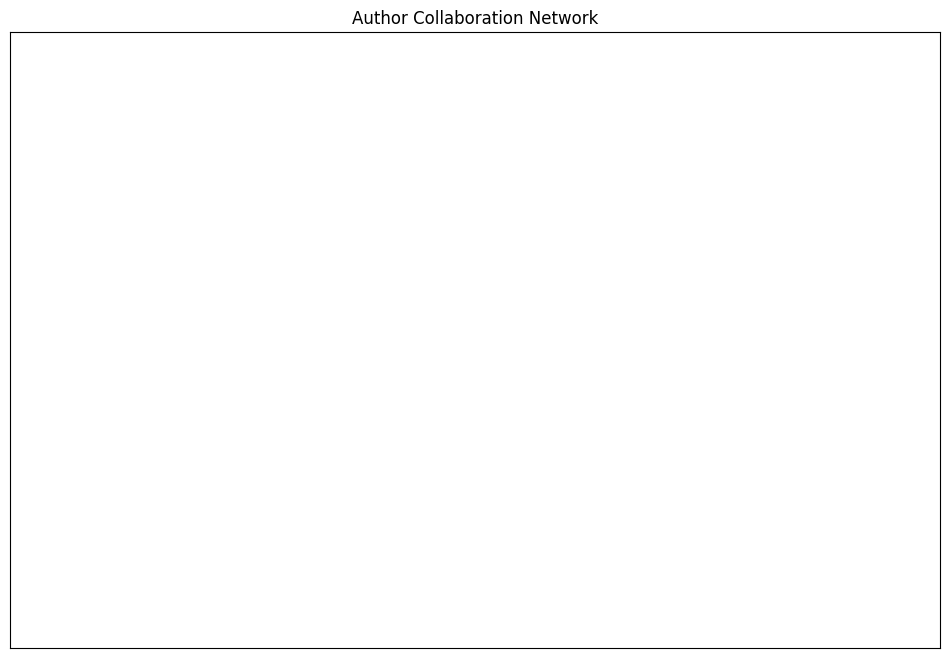

In [34]:
def create_author_pairs(row):
    if row and isinstance(row, list):
        return list(itertools.combinations(row, 2))
    return []

# Apply the function to each row and concatenate the results
author_pairs = df['authors'].apply(create_author_pairs).sum()

# Create a DataFrame from the author pairs
author_pairs_df = pd.DataFrame(author_pairs, columns=['Author1', 'Author2'])

# Creating a graph from the DataFrame
G = nx.from_pandas_edgelist(author_pairs_df, 'Author1', 'Author2')

# Draw the network graph
plt.figure(figsize=(12, 8))
nx.draw_networkx(G, with_labels=True, node_color='skyblue', edge_color='gray', font_size=10)
plt.title("Author Collaboration Network")
plt.show()

In [ ]:
df.head()

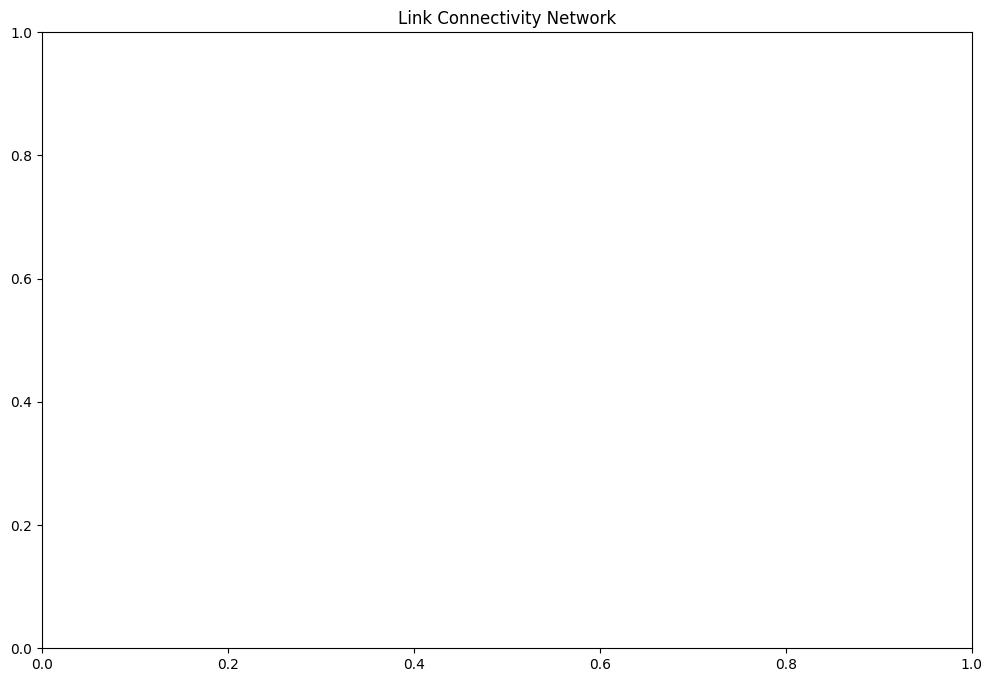

In [35]:
# Assuming df is already loaded with the appropriate data

# Function to create pairs of links
def create_link_pairs(row):
    if row and isinstance(row, list):
        return list(itertools.combinations(row, 2))
    return []

# Apply the function to each row and concatenate the results
link_pairs = df['link_hrefs'].apply(create_link_pairs).sum()

# Create a DataFrame from the link pairs
link_pairs_df = pd.DataFrame(link_pairs, columns=['Link1', 'Link2'])

# Count the frequency of each pair
link_pairs_count = link_pairs_df.groupby(['Link1', 'Link2']).size().reset_index(name='Count')


threshold = 2
# Filter out infrequent pairs for clearer visualization
filtered_link_pairs_count = link_pairs_count[link_pairs_count['Count'] > threshold]  # Set a threshold value

# Creating a graph from the DataFrame
G = nx.from_pandas_edgelist(filtered_link_pairs_count, 'Link1', 'Link2', ['Count'])

# Draw the network graph
plt.figure(figsize=(12, 8))
edges = G.edges(data=True)
weights = [edge[2]['Count'] for edge in edges]
nx.draw_networkx(G, with_labels=False, node_size=50, width=weights, edge_color='blue', alpha=0.7)
plt.title("Link Connectivity Network")
plt.show()

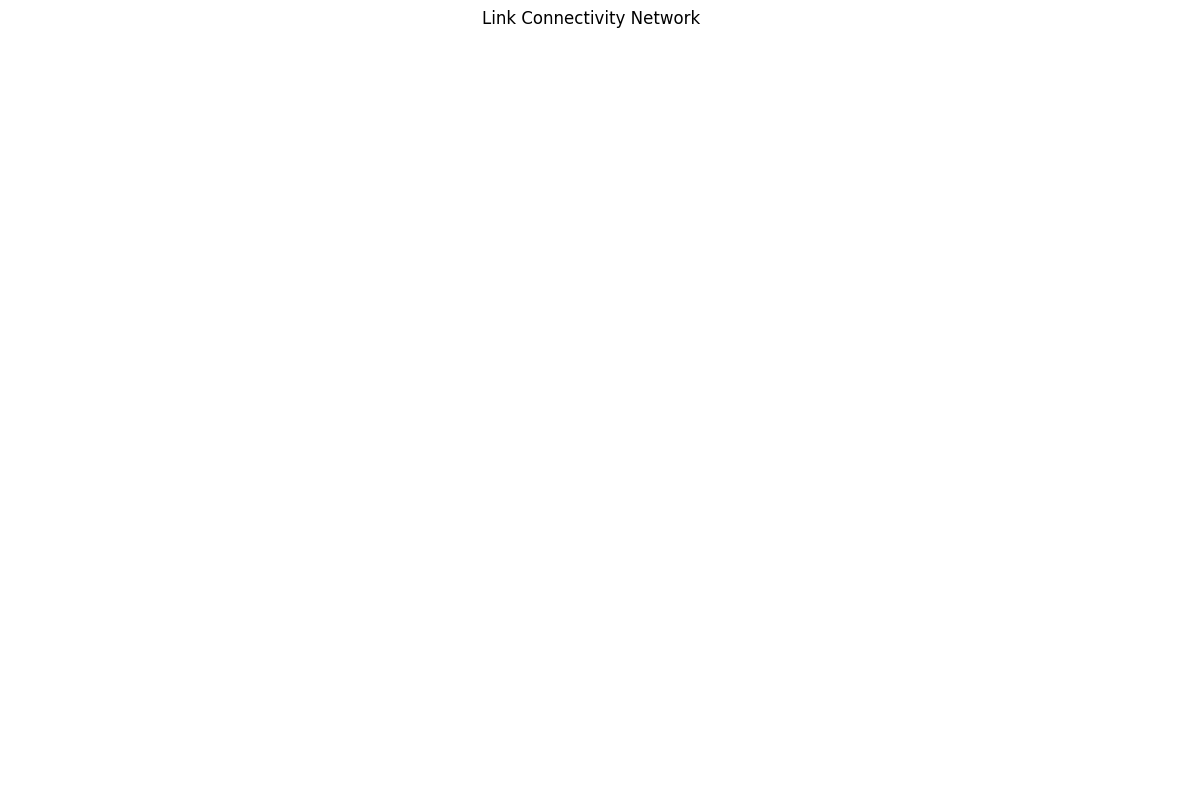

In [36]:
# Filter out infrequent pairs for clearer visualization
threshold = 2  # Set a threshold value for visibility
filtered_link_pairs_count = link_pairs_count[link_pairs_count['Count'] > threshold]

# Creating a graph from the DataFrame
G = nx.from_pandas_edgelist(filtered_link_pairs_count, 'Link1', 'Link2', ['Count'])

# Draw the network graph with labels
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G, k=0.5)  # k adjusts the distance between nodes
edges = G.edges(data=True)
weights = [edge[2]['Count'] for edge in edges]
nx.draw_networkx(G, pos, with_labels=True, node_size=50, width=weights, edge_color='purple', alpha=0.7, font_size=8)
plt.title("Link Connectivity Network")
plt.axis('off')  # Turn off the axis
plt.show()

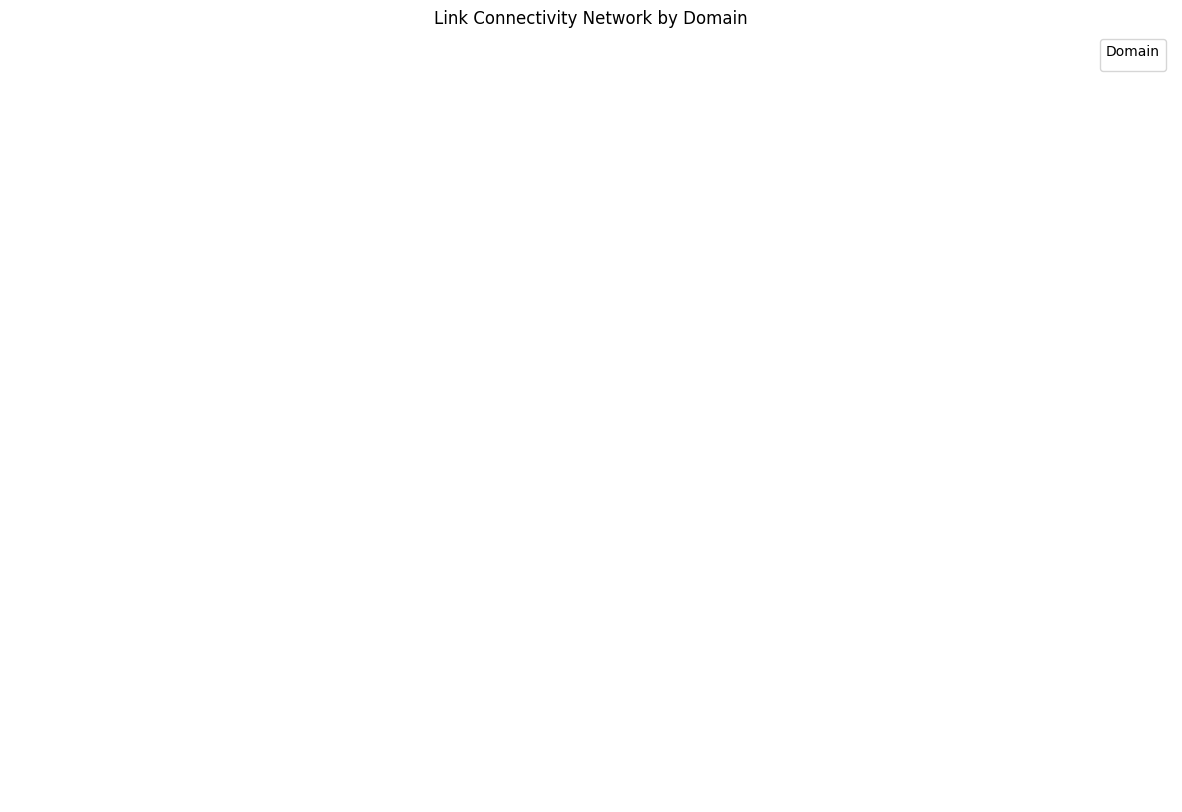

In [37]:
# Assuming df is already loaded with the appropriate data

# Function to create pairs of links
def create_link_pairs(row):
    if row and isinstance(row, list):
        return list(itertools.combinations(row, 2))
    return []

# Function to extract domain from a URL
def get_domain(url):
    try:
        return urlparse(url).netloc
    except:
        return 'Unknown'

# Function to format the path of the URL
def format_domain_label(url):
    path = urlparse(url).path
    # Remove the leading '/' if present
    if path.startswith('/'):
        path = path[1:]
    if len(path) > 48:
        return path[:45] + "..."
    return path
 

# Apply the function to each row and concatenate the results
link_pairs = df['link_hrefs'].apply(create_link_pairs).sum()

# Create a DataFrame from the link pairs
link_pairs_df = pd.DataFrame(link_pairs, columns=['Link1', 'Link2'])

# Extract domains and add them as columns
link_pairs_df['Domain1'] = link_pairs_df['Link1'].apply(get_domain)
link_pairs_df['Domain2'] = link_pairs_df['Link2'].apply(get_domain)

# Count the frequency of each pair
link_pairs_count = link_pairs_df.groupby(['Link1', 'Link2', 'Domain1', 'Domain2']).size().reset_index(name='Count')

# Filter out infrequent pairs for clearer visualization
threshold = 1  # Set a threshold value for visibility
filtered_link_pairs_count = link_pairs_count[link_pairs_count['Count'] > threshold]

# Creating a graph from the DataFrame
G = nx.from_pandas_edgelist(filtered_link_pairs_count, 'Link1', 'Link2', ['Count'])

# Assign a color to each domain
domains = list(set(filtered_link_pairs_count['Domain1']).union(set(filtered_link_pairs_count['Domain2'])))
color_map = {domain: np.random.rand(3,) for domain in domains}

# Draw the network graph with colored nodes
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G, k=0.5)
edges = G.edges(data=True)
weights = [edge[2]['Count'] for edge in edges]

for node in G:
    nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color=[color_map[get_domain(node)]], node_size=50, alpha=0.7)
nx.draw_networkx_edges(G, pos, width=weights, edge_color='gray', alpha=0.5)
# nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')
# Drawing the labels with formatted domain names
formatted_labels = {node: format_domain_label(node) for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=formatted_labels, font_size=8, font_color='black')


# Creating the legend
patch_list = [plt.Line2D([0], [0], marker='o', color='w', label=domain, markersize=10, markerfacecolor=color) for domain, color in color_map.items()]
plt.legend(handles=patch_list, loc='upper right', title='Domain')

plt.title("Link Connectivity Network by Domain")
plt.axis('off')
plt.show()

# plot saving

In [ ]:
plt.figure(figsize=(30, 20))  # You can adjust the size as needed


pos = nx.spring_layout(G, k=0.5)
edges = G.edges(data=True)
weights = [edge[2]['Count'] for edge in edges]

for node in G:
    nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color=[color_map[get_domain(node)]], node_size=50, alpha=0.7)
nx.draw_networkx_edges(G, pos, width=weights, edge_color='gray', alpha=0.5)
# nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')
# Drawing the labels with formatted domain names
formatted_labels = {node: format_domain_label(node) for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=formatted_labels, font_size=8, font_color='black')


# Creating the legend
patch_list = [plt.Line2D([0], [0], marker='o', color='w', label=domain, markersize=10, markerfacecolor=color) for domain, color in color_map.items()]
plt.legend(handles=patch_list, loc='upper right', title='Domain')


plt.title("Link Connectivity Network by Domain")
plt.axis('off')

# Save the figure as a PNG file
plt.savefig('network_graph.png', format='png', dpi=300, bbox_inches='tight')

plt.show()
